In [29]:
##Import necessary libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.impute import SimpleImputer
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from pprint import pprint
import seaborn as sns
from subprocess import call

In [2]:
#import training and test dataframes using pandas

df_train = pd.read_csv("..path\\to\\train.csv")
df_test = pd.read_csv("..path\\to\\test.csv")

In [3]:
# Feature Engineering

#We need to deal with the edjefe and edjefa columns because they contain numerical values and strings.
# If a person is a HH, he or she contains a "yes" or "no" value
cols = ['edjefe', 'edjefa']
df_train[cols] = df_train[cols].replace({'no': 0, 'yes':1}).astype(float)
df_test[cols] = df_test[cols].replace({'no': 0, 'yes':1}).astype(float)

In [4]:
# Feature Engineering

#This is to fix a data error
df_train['roof_waste_material'] = np.nan
df_test['roof_waste_material'] = np.nan
df_train['electricity_other'] = np.nan
df_test['electricity_other'] = np.nan

def fill_roof_exception(x):
    if (x['techozinc'] == 0) and (x['techoentrepiso'] == 0) and (x['techocane'] == 0) and (x['techootro'] == 0):
        return 1
    else:
        return 0
    
def fill_no_electricity(x):
    if (x['public'] == 0) and (x['planpri'] == 0) and (x['noelec'] == 0) and (x['coopele'] == 0):
        return 1
    else:
        return 0

In [5]:
# Feature Engineering

#Continued error correction from dataset

df_train['roof_waste_material'] = df_train.apply(lambda x : fill_roof_exception(x),axis=1)
df_test['roof_waste_material'] = df_test.apply(lambda x : fill_roof_exception(x),axis=1)
df_train['electricity_other'] = df_train.apply(lambda x : fill_no_electricity(x),axis=1)
df_test['electricity_other'] = df_test.apply(lambda x : fill_no_electricity(x),axis=1)

In [6]:
# Continued feature engineering

# This section details creating a variety of features from our already provided features

# Most of these methods deal with creating HH-wide variables dealing with proportions of certain features to others
# For the most part, these are simple algebraic expressions

df_train['adult'] = df_train['hogar_adul'] - df_train['hogar_mayor']

df_train['dependency_count'] = df_train['hogar_nin'] + df_train['hogar_mayor']

df_train['dependency'] = df_train['dependency_count'] / df_train['adult']

df_train['child_percent'] = df_train['hogar_nin']/df_train['hogar_total']

df_train['elder_percent'] = df_train['hogar_mayor']/df_train['hogar_total']

df_train['adult_percent'] = df_train['hogar_adul']/df_train['hogar_total']

df_test['adult'] = df_test['hogar_adul'] - df_test['hogar_mayor']

df_test['dependency_count'] = df_test['hogar_nin'] + df_test['hogar_mayor']

df_test['dependency'] = df_test['dependency_count'] / df_test['adult']

df_test['child_percent'] = df_test['hogar_nin']/df_test['hogar_total']

df_test['elder_percent'] = df_test['hogar_mayor']/df_test['hogar_total']

df_test['adult_percent'] = df_test['hogar_adul']/df_test['hogar_total']

df_train['rent_per_adult'] = df_train['v2a1']/df_train['hogar_adul']

df_train['rent_per_person'] = df_train['v2a1']/df_train['hhsize']

df_test['rent_per_adult'] = df_test['v2a1']/df_test['hogar_adul']

df_test['rent_per_person'] = df_test['v2a1']/df_test['hhsize']

df_train['overcrowding_room_and_bedroom'] = (df_train['hacdor'] + df_train['hacapo'])/2

df_test['overcrowding_room_and_bedroom'] = (df_test['hacdor'] + df_test['hacapo'])/2

df_train['no_appliances'] = df_train['refrig'] + df_train['computer'] + df_train['television']

df_test['no_appliances'] = df_test['refrig'] + df_test['computer'] + df_test['television']

df_train['r4h1_percent_in_male'] = df_train['r4h1'] / df_train['r4h3']

df_train['r4m1_percent_in_female'] = df_train['r4m1'] / df_train['r4m3']

df_train['r4h1_percent_in_total'] = df_train['r4h1'] / df_train['hhsize']

df_train['r4m1_percent_in_total'] = df_train['r4m1'] / df_train['hhsize']

df_train['r4t1_percent_in_total'] = df_train['r4t1'] / df_train['hhsize']

df_test['r4h1_percent_in_male'] = df_test['r4h1'] / df_test['r4h3']

df_test['r4m1_percent_in_female'] = df_test['r4m1'] / df_test['r4m3']

df_test['r4h1_percent_in_total'] = df_test['r4h1'] / df_test['hhsize']

df_test['r4m1_percent_in_total'] = df_test['r4m1'] / df_test['hhsize']

df_test['r4t1_percent_in_total'] = df_test['r4t1'] / df_test['hhsize']

df_train['rent_per_room'] = df_train['v2a1']/df_train['rooms']

df_train['bedroom_per_room'] = df_train['bedrooms']/df_train['rooms']

df_train['elder_per_room'] = df_train['hogar_mayor']/df_train['rooms']

df_train['adults_per_room'] = df_train['adult']/df_train['rooms']

df_train['child_per_room'] = df_train['hogar_nin']/df_train['rooms']

df_train['male_per_room'] = df_train['r4h3']/df_train['rooms']

df_train['female_per_room'] = df_train['r4m3']/df_train['rooms']

df_train['room_per_person_household'] = df_train['hhsize']/df_train['rooms']

df_test['rent_per_room'] = df_test['v2a1']/df_test['rooms']

df_test['bedroom_per_room'] = df_test['bedrooms']/df_test['rooms']

df_test['elder_per_room'] = df_test['hogar_mayor']/df_test['rooms']

df_test['adults_per_room'] = df_test['adult']/df_test['rooms']

df_test['child_per_room'] = df_test['hogar_nin']/df_test['rooms']

df_test['male_per_room'] = df_test['r4h3']/df_test['rooms']

df_test['female_per_room'] = df_test['r4m3']/df_test['rooms']

df_test['room_per_person_household'] = df_test['hhsize']/df_test['rooms']

df_train['rent_per_bedroom'] = df_train['v2a1']/df_train['bedrooms']

df_train['edler_per_bedroom'] = df_train['hogar_mayor']/df_train['bedrooms']

df_train['adults_per_bedroom'] = df_train['adult']/df_train['bedrooms']

df_train['child_per_bedroom'] = df_train['hogar_nin']/df_train['bedrooms']

df_train['male_per_bedroom'] = df_train['r4h3']/df_train['bedrooms']

df_train['female_per_bedroom'] = df_train['r4m3']/df_train['bedrooms']

df_train['bedrooms_per_person_household'] = df_train['hhsize']/df_train['bedrooms']

df_test['rent_per_bedroom'] = df_test['v2a1']/df_test['bedrooms']

df_test['edler_per_bedroom'] = df_test['hogar_mayor']/df_test['bedrooms']

df_test['adults_per_bedroom'] = df_test['adult']/df_test['bedrooms']

df_test['child_per_bedroom'] = df_test['hogar_nin']/df_test['bedrooms']

df_test['male_per_bedroom'] = df_test['r4h3']/df_test['bedrooms']

df_test['female_per_bedroom'] = df_test['r4m3']/df_test['bedrooms']

df_test['bedrooms_per_person_household'] = df_test['hhsize']/df_test['bedrooms']

df_train['tablet_per_person_household'] = df_train['v18q1']/df_train['hhsize']

df_train['phone_per_person_household'] = df_train['qmobilephone']/df_train['hhsize']

df_test['tablet_per_person_household'] = df_test['v18q1']/df_test['hhsize']

df_test['phone_per_person_household'] = df_test['qmobilephone']/df_test['hhsize']

df_train['age_12_19'] = df_train['hogar_nin'] - df_train['r4t1']

df_test['age_12_19'] = df_test['hogar_nin'] - df_test['r4t1']    

df_train['escolari_age'] = df_train['escolari']/df_train['age']

df_test['escolari_age'] = df_test['escolari']/df_test['age']

df_train['rez_esc_escolari'] = df_train['rez_esc']/df_train['escolari']

df_train['rez_esc_r4t1'] = df_train['rez_esc']/df_train['r4t1']

df_train['rez_esc_r4t2'] = df_train['rez_esc']/df_train['r4t2']

df_train['rez_esc_r4t3'] = df_train['rez_esc']/df_train['r4t3']

df_train['rez_esc_age'] = df_train['rez_esc']/df_train['age']

df_test['rez_esc_escolari'] = df_test['rez_esc']/df_test['escolari']

df_test['rez_esc_r4t1'] = df_test['rez_esc']/df_test['r4t1']

df_test['rez_esc_r4t2'] = df_test['rez_esc']/df_test['r4t2']

df_test['rez_esc_r4t3'] = df_test['rez_esc']/df_test['r4t3']

df_test['rez_esc_age'] = df_test['rez_esc']/df_test['age']

In [7]:
#Remove useless feature to reduce dimension
df_train.drop(columns=['agesq', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned'], inplace=True)

#Because of the method I will use to make predictions on the test document, I will not need to apply the dropping of columns to derive the same insight 

In [8]:
df_train_1 = df_train.select_dtypes(exclude=['object'])
df_train_1.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,bedrooms_per_person_household,tablet_per_person_household,phone_per_person_household,age_12_19,escolari_age,rez_esc_escolari,rez_esc_r4t1,rez_esc_r4t2,rez_esc_r4t3,rez_esc_age
0,190000.0,0,3,0,1,1,0,NaN,0,1,...,1.000000,NaN,1.00,0,0.232558,NaN,NaN,NaN,NaN,NaN
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,1.000000,1.00,1.00,0,0.179104,NaN,NaN,NaN,NaN,NaN
2,NaN,0,8,0,1,1,0,NaN,0,0,...,0.500000,NaN,0.00,0,0.119565,NaN,NaN,NaN,NaN,NaN
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,1.333333,0.25,0.75,1,0.529412,0.111111,1.0,0.333333,0.25,0.058824
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,1.333333,0.25,0.75,1,0.297297,NaN,NaN,NaN,NaN,NaN


In [9]:
df_train_1.shape

(9557, 172)

In [10]:
df_train_1 = df_train_1.replace([np.inf, -np.inf], np.nan)

In [11]:
#These columns contain NA values
listo = df_train_1.columns[df_train_1.isna().any()].tolist()

In [12]:
#No, we don't need to make a "for" loop for this
## However, this loop preempts my method for imputing
for i in listo:
    print(i)

v2a1
v18q1
rez_esc
dependency
meaneduc
rent_per_adult
rent_per_person
r4h1_percent_in_male
r4m1_percent_in_female
rent_per_room
rent_per_bedroom
tablet_per_person_household
escolari_age
rez_esc_escolari
rez_esc_r4t1
rez_esc_r4t2
rez_esc_r4t3
rez_esc_age


In [13]:
#Let's impute the NaN values with the means of their respective columns

#We'll need this to ignore the warnings due to the df manipulation
import warnings
warnings.filterwarnings('ignore')

imp=SimpleImputer(missing_values=np.nan, strategy="mean")

for i in listo:
    imp.fit(df_train_1[[i]])
    df_train_1[[i]] = imp.fit_transform(df_train_1[[i]])

In [14]:
#Perform the same for the test data
df_test = df_test.replace([np.inf, -np.inf], np.nan)

#These columns contain NA values
listo = df_test.columns[df_test.isna().any()].tolist()

for i in listo:
    imp.fit(df_test[[i]])
    df_test[[i]] = imp.fit_transform(df_test[[i]])

In [15]:
df_train_1.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,bedrooms_per_person_household,tablet_per_person_household,phone_per_person_household,age_12_19,escolari_age,rez_esc_escolari,rez_esc_r4t1,rez_esc_r4t2,rez_esc_r4t3,rez_esc_age
0,190000.000000,0,3,0,1,1,0,1.404063,0,1,...,1.000000,0.402257,1.00,0,0.232558,0.101626,0.274752,0.133043,0.108679,0.031028
1,135000.000000,0,4,0,1,1,1,1.000000,0,1,...,1.000000,1.000000,1.00,0,0.179104,0.101626,0.274752,0.133043,0.108679,0.031028
2,165231.606971,0,8,0,1,1,0,1.404063,0,0,...,0.500000,0.402257,0.00,0,0.119565,0.101626,0.274752,0.133043,0.108679,0.031028
3,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,1.333333,0.250000,0.75,1,0.529412,0.111111,1.000000,0.333333,0.250000,0.058824
4,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,1.333333,0.250000,0.75,1,0.297297,0.101626,0.274752,0.133043,0.108679,0.031028


In [16]:
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,bedrooms_per_person_household,tablet_per_person_household,phone_per_person_household,age_12_19,escolari_age,rez_esc_escolari,rez_esc_r4t1,rez_esc_r4t2,rez_esc_r4t3,rez_esc_age
0,ID_2f6873615,174872.554316,0,5,0,1,1,0,1.348517,1,...,1.5,0.369162,0.666667,0,0.000000,0.085934,0.261372,0.123951,0.098355,0.030434
1,ID_1c78846d2,174872.554316,0,5,0,1,1,0,1.348517,1,...,1.5,0.369162,0.666667,0,0.390244,0.085934,0.261372,0.123951,0.098355,0.030434
2,ID_e5442cf6a,174872.554316,0,5,0,1,1,0,1.348517,1,...,1.5,0.369162,0.666667,0,0.414634,0.085934,0.261372,0.123951,0.098355,0.030434
3,ID_a8db26a79,174872.554316,0,14,0,1,1,1,1.000000,0,...,1.0,1.000000,2.000000,0,0.271186,0.085934,0.261372,0.123951,0.098355,0.030434
4,ID_a62966799,175000.000000,0,4,0,1,1,1,1.000000,0,...,0.5,1.000000,1.000000,1,0.611111,0.085934,0.261372,0.123951,0.098355,0.030434


In [17]:
# divide into attributes and labels
X = df_train_1.drop('Target', axis=1)  
y = df_train_1['Target'] 

In [18]:
#Split our training and validation data by the 80/20 method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Random Forest 

In [19]:
# Building a random forest model
rf_classifier = RandomForestClassifier(random_state=321)  

#Let's see all of our parameters
print('Parameters currently in use:\n')
pprint(rf_classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 321,
 'verbose': 0,
 'warm_start': False}


In [20]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 150, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 24, 38, 52, 66, 80, 94, 108, 122, 136, 150, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 3, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [35]:
rf = RandomForestClassifier(random_state=321)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 250, cv = 5, verbose=2, random_state=321, n_jobs = -1)

In [36]:
rf_random.fit(X_train, y_train)  

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 66.1min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 78.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=321, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=250, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 24, 38, 52, 66, 80, 94, 108, 122, 136, 150, None], 'min_samples_split': [2, 3, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=321, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [37]:
y_pred = rf_random.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  95.7112970711297


In [38]:
print("Macro F1 Score is ", f1_score(y_test,y_pred, average ='macro'))
print("Weighted F1 Score is ", f1_score(y_test,y_pred, average ='weighted'))

Macro F1 Score is  0.929885661895076
Weighted F1 Score is  0.9564431171277852


In [39]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 122,
 'bootstrap': False}

In [21]:
#Ensure that we have the same paramters as are specified in the cell above
classifier = RandomForestClassifier(n_jobs=-1,
                                    min_samples_split = 2, 
                                    n_estimators = 1000, 
                                    min_samples_leaf = 1,
                                    max_features='auto',
                                    max_depth = 122,
                                    bootstrap=False,
                                    random_state=321)

In [22]:
classifier.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=122, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=321, verbose=0, warm_start=False)

In [42]:
y_pred = classifier.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  95.7112970711297


In [43]:
y_pred = classifier.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)
print("Macro F1 Score is ", f1_score(y_test,y_pred, average ='macro'))
print("Weighted F1 Score is ", f1_score(y_test,y_pred, average ='weighted'))

Macro F1 Score is  0.929885661895076
Weighted F1 Score is  0.9564431171277852


In [44]:
# https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough 
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': classifier.feature_importances_})
feature_importances.head()

,feature,importance
0,v2a1,0.010192
1,hacdor,0.001077
2,rooms,0.012091
3,hacapo,0.000496
4,v14a,0.000530


In [61]:
#https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough
def plot_feature_importances(df, n = 10, threshold = None):

    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

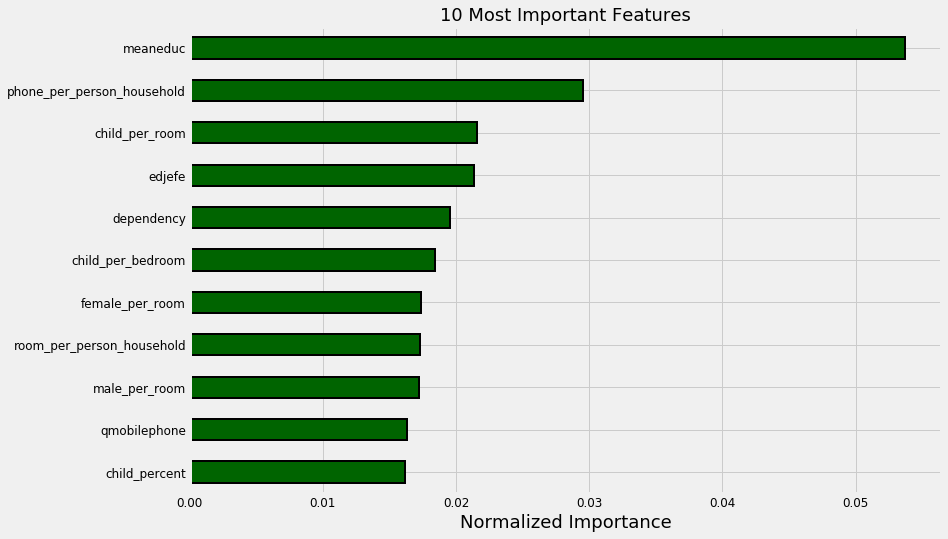

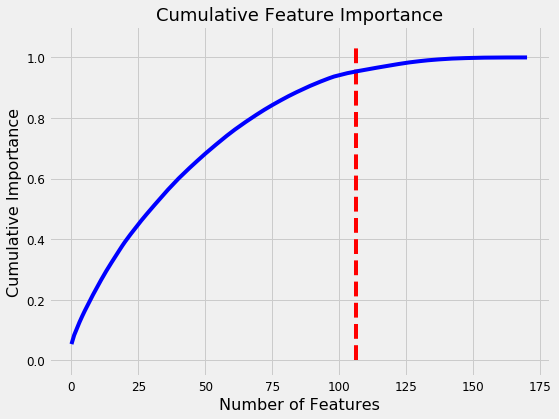

106 features required for 95% of cumulative importance.


In [46]:
#https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

In [47]:
#Precision, recall, and other metrics.
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.85      0.97      0.91       144
           2       0.91      0.93      0.92       303
           3       0.89      0.93      0.91       208
           4       1.00      0.97      0.98      1257

   micro avg       0.96      0.96      0.96      1912
   macro avg       0.91      0.95      0.93      1912
weighted avg       0.96      0.96      0.96      1912



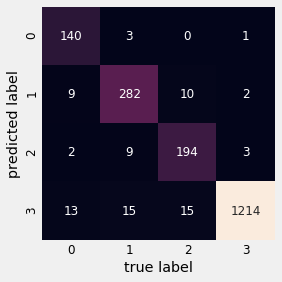

In [48]:
#Visualizing the confusion matrix for our model
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [23]:
#Dropping the target column for identifying the features to use in prediction

df_train_2 = df_train_1.drop(['Target'], axis=1)
features = df_train_2.columns

In [28]:
#Let's create a visualiztion of a single tree from the forest
#https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
# Extract single tree
estimator = classifier.estimators_[7]

export_graphviz(estimator, out_file='..path\\to\\singrftree.dot', 
                feature_names = features,
                class_names = ["1", "2", "3", "4"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [32]:
# I used the following command from anaconda prompt to convert the dot file to a png

#dot -Tpng B:\kaggle_cr\singrftree.dot -o B:\kaggle_cr\singrftree.png

In [33]:
#The tree is a little large. However, the png image can be useful for exploration of branches

In [43]:
#Let's make some predictions

sample_pred = classifier.predict(df_test[features])
sample_pred

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [44]:
df = pd.DataFrame(sample_pred)

In [45]:
df_test['Target'] = df

In [46]:
df_final = df_test[['Id', 'Target']]

In [47]:
df_final.to_csv("B:\\kaggle_cr\\submit_rf3.csv", index = False)

## Decision Tree

In [39]:
# Building a model
dt_classifier = DecisionTreeClassifier(random_state=321)  

#Let's see all of our parameters
print('Parameters currently in use:\n')
pprint(dt_classifier.get_params())

Parameters currently in use:

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 321,
 'splitter': 'best'}


In [45]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 150, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# presort method.
presort = [True, False]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'presort': presort}
pprint(random_grid)

{'max_depth': [10, 24, 38, 52, 66, 80, 94, 108, 122, 136, 150, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 3, 5, 10],
 'presort': [True, False]}


In [46]:
dt = DecisionTreeClassifier(random_state=321)

dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 150, cv = 4, verbose=2, random_state=321, n_jobs = -1)

In [47]:
dt_random.fit(X_train, y_train)  

Fitting 4 folds for each of 150 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   15.7s finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=321,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=150, n_jobs=-1,
          param_distributions={'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 24, 38, 52, 66, 80, 94, 108, 122, 136, 150, None], 'min_samples_split': [2, 3, 5, 10], 'min_samples_leaf': [1, 2, 4], 'presort': [True, False]},
          pre_dispatch='2*n_jobs', random_state=321, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [48]:
y_pred = dt_random.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)
print("Macro F1 Score is ", f1_score(y_test,y_pred, average ='macro'))
print("Weighted F1 Score is ", f1_score(y_test,y_pred, average ='weighted'))

Accuracy is  86.71548117154812
Macro F1 Score is  0.7963619453132181
Weighted F1 Score is  0.8665370563520997


In [54]:
dt_random.best_params_

{'presort': True,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 94}

In [56]:
classifier = DecisionTreeClassifier(presort=True,
                                    min_samples_split=2,
                                    min_samples_leaf = 1,
                                    max_features='log2',
                                    max_depth = 94,
                                    random_state=321)

In [57]:
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=94,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=True, random_state=321,
            splitter='best')

In [58]:
y_pred = classifier.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)
print("Macro F1 Score is ", f1_score(y_test,y_pred, average ='macro'))
print("Weighted F1 Score is ", f1_score(y_test,y_pred, average ='weighted'))

Accuracy is  86.71548117154812
Macro F1 Score is  0.7963619453132181
Weighted F1 Score is  0.8665370563520997


In [59]:
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': classifier.feature_importances_})
feature_importances.head()

,feature,importance
0,v2a1,0.011495
1,hacdor,0.001801
2,rooms,0.012355
3,hacapo,0.000000
4,v14a,0.000375


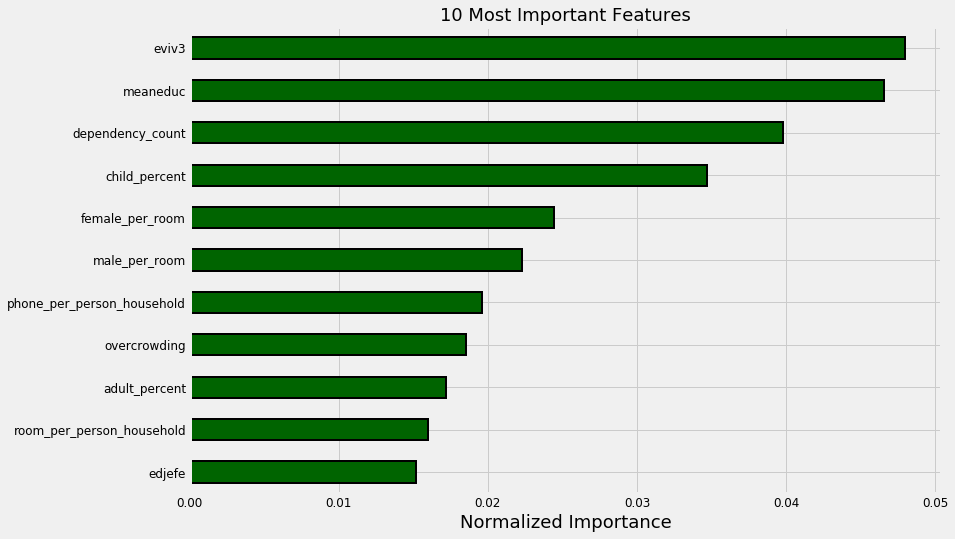

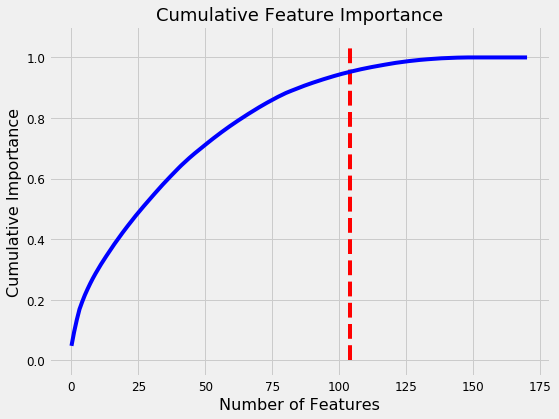

104 features required for 95% of cumulative importance.


In [62]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

In [63]:
#Precision, recall, and other metrics.
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.73      0.73      0.73       139
           2       0.77      0.79      0.78       315
           3       0.73      0.75      0.74       242
           4       0.94      0.93      0.93      1216

   micro avg       0.87      0.87      0.87      1912
   macro avg       0.79      0.80      0.80      1912
weighted avg       0.87      0.87      0.87      1912



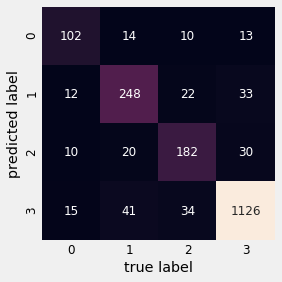

In [64]:
#Visualizing the confusion matrix for our model
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [65]:
#creating an image for our tree
export_graphviz(classifier, out_file='..path\\to\\dtree.dot', 
                feature_names = features,
                class_names = ["1", "2", "3", "4"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
## I used the following command from anaconda prompt to convert the dot file to a png

#dot -Tpng ..path\\to\\dtree.dot -o ..path\\to\\dtree.png

## As evidenced above, the tuned random forest model performs much better (in most metrics) than the single decision tree model. This is expected.

## However, there are interesting disparities between the two models; the eviv3 variable appears as the most important variable in the decision tree model. Due to the relative non-importance of eviv3 in the RF model, it is odd that eviv3 would appear as most important in the DT. The variability of important features could explain the severe metrics dropoff experienced by the DT model.